sko mhuerta

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


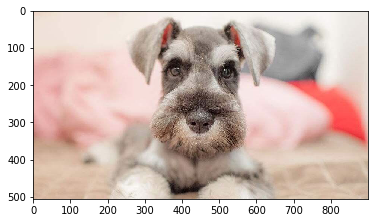

In [2]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/drive/My Drive/ References/ecole42/project/rushes/numpy/'
img_original = mpimg.imread(file_path + 'dog.jpg')
plt.imshow(img_original)

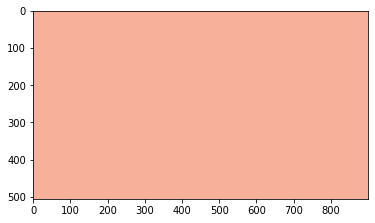

In [3]:
#fill1
MAX = (255, 255, 255)
img_zero = np.zeros(img_original.shape, img_original.dtype)
[r, g, b] = [247, 176, 153]
img_fill1 = img_zero + (r, g, b)
plt.imshow(img_fill1)

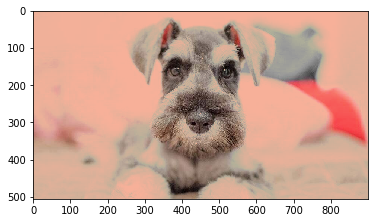

In [4]:
#imagechops.darker
'''
Compares the two images, pixel by pixel, and returns a new image containing the darker values.
out = min(image1, image2)
reference:
https://pillow.readthedocs.io/en/3.1.x/reference/ImageChops.html
'''
img_darker =  np.minimum(img_original, img_fill1)
plt.imshow(img_darker)

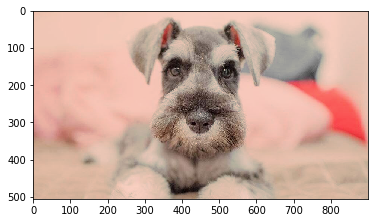

In [5]:
#image blend
'''
  Creates a new image by interpolating between two input images, using a constant alpha.:
  out = image1 * (1.0 - alpha) + image2 * alpha
  reference:
  https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
'''
p = .56
img_blend0 = img_original * (1.0 - p) + (img_darker * p)
plt.imshow(img_blend0.astype(int))

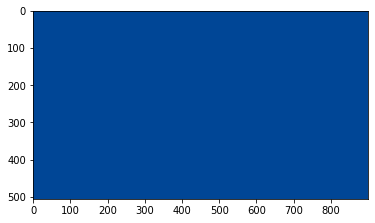

In [6]:
#fill2
MAX = (255, 255, 255)
img_zero = np.zeros(img_original.shape, img_original.dtype)
[r, g, b] = [0, 70, 150]
img_fill2 = img_zero + (r, g, b)
plt.imshow(img_fill2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


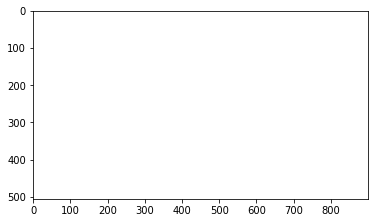

In [7]:
#imagechops.lighter
'''
  Compares the two images, pixel by pixel, and returns a new image containing the lighter values.
  out = max(image1, image2)
  reference:
  https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
'''
img_lighter = np.maximum(img_blend0, img_fill2)
plt.imshow(img_lighter)

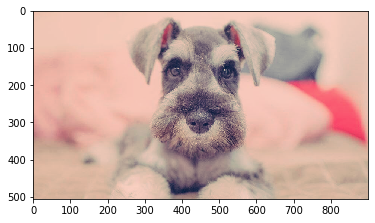

In [8]:
#image blend
'''
  Creates a new image by interpolating between two input images, using a constant alpha.:
  out = image1 * (1.0 - alpha) + image2 * alpha
  reference:
  https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
'''
p = .4
img_blend1 = img_blend0 * (1.0 - p) + (img_lighter * p)
plt.imshow(img_blend1.astype(int))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


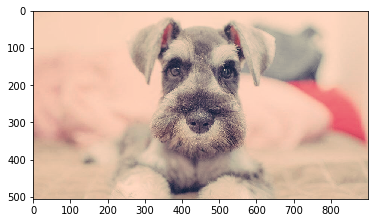

In [9]:
#image sepia
'''
A sepia operation is equivalent to the following matrix operation:
  | R' |     |0.393+0.607s  0.769-0.769s  0.189-0.189s 0  0 |   | R |
  | G' |     |0.349-0.349s  0.686+0.314s  0.168-0.168s 0  0 |   | G |
  | B' |  =  |0.272-0.272g  0.534-0.534g  0.131+0.869g 0  0 | * | B |
  | A' |     |          0             0             0  1  0 |   | A |
  | 1  |     |          0             0             0  0  1 |   | 1 |
  See the W3C document:
  https://www.w3.org/TR/filter-effects-1/#sepiaEquivalent
'''
img_proc = img_blend1.astype(int);
img_sepia = np.zeros(img_proc.shape, img_proc.dtype)
s = 0.8
for width in range(img_proc.shape[0]):
    for height in range(img_proc.shape[1]):
        r = img_proc[width, height][0]
        g = img_proc[width, height][1]
        b = img_proc[width, height][2]
        img_sepia[width, height] = [(0.393+0.607*s)*r + (0.769-0.769*s)*g + (0.189-0.189*s)*b,
          (0.349-0.349*s)*r + (0.686+0.314*s)*g + (0.168-0.168*s)*b,
          (0.272-0.272*s)*r + (0.534-0.534*s)*g + (0.131+0.869*s)*b]
plt.imshow(img_sepia)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


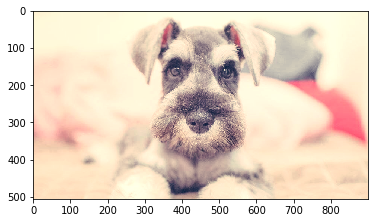

In [10]:
#image contrast
'''
Adjusts the contrast.
  A contrast operation is equivalent to the following matrix operation:
      | R' |     | c  0  0  0  -0.5c+0.5 |   | R |
      | G' |     | 0  c  0  0  -0.5c+0.5 |   | G |
      | B' |  =  | 0  0  c  0  -0.5c+0.5 | * | B |
      | A' |     | 0  0  0  1          0 |   | A |
      | 1  |     | 0  0  0  0          1 |   | 1 |
  See the W3C document:
  https://www.w3.org/TR/filter-effects-1/#contrastEquivalent.
'''
c = 1.2
img_proc = img_sepia.astype(int);
image_contrast = np.zeros(img_proc.shape, img_proc.dtype)
for width in range(img_proc.shape[0]):
    for height in range(img_proc.shape[1]):
        r = img_proc[width, height][0]
        g = img_proc[width, height][1]
        b = img_proc[width, height][2]
        image_contrast[width, height] = [
          c*(r - 0.5) + 0.5,
          c*(g - 0.5) + 0.5,
          c*(b - 0.5) + 0.5]
plt.imshow(image_contrast.astype(int))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


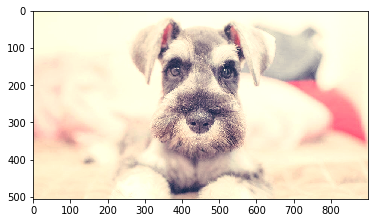

In [11]:
#image brightness
'''
purpose : adjusts the brightness
  A brightness matrix operation:
      | R' |     | c  0  0 |   | R |
      | G' |  =  | 0  c  0 | * | G |
      | B' |     | 0  0  c |   | B |
  W3C reference:
  https://www.w3.org/TR/filter-effects-1/#brightnessEquivalent
'''
c = 1.05
img_proc = image_contrast.astype(int);
image_brightness = np.zeros(img_proc.shape, img_proc.dtype)
for width in range(img_proc.shape[0]):
    for height in range(img_proc.shape[1]):
        r = img_proc[width, height][0]
        g = img_proc[width, height][1]
        b = img_proc[width, height][2]
        image_brightness[width, height] = [
          c*r,
          c*g,
          c*b]
plt.imshow(image_brightness.astype(int))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


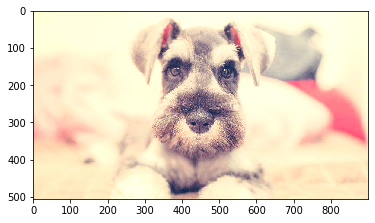

In [12]:
#image saturate
'''
Saturates image.
  A saturate matrix operation:
      | R' |     |0.213+0.787s  0.715-0.715s  0.072-0.072s 0  0 |   | R |
      | G' |     |0.213-0.213s  0.715+0.285s  0.072-0.072s 0  0 |   | G |
      | B' |  =  |0.213-0.213s  0.715-0.715s  0.072+0.928s 0  0 | * | B |
      | A' |     |           0            0             0  1  0 |   | A |
      | 1  |     |           0            0             0  0  1 |   | 1 |
  W3C reference:
  https://www.w3.org/TR/SVG11/filters.html#feColorMatrixValuesAttribute
'''
img_proc = image_brightness.astype(int);
img_saturate = np.zeros(img_proc.shape, img_proc.dtype)
s = 1.2
for width in range(img_proc.shape[0]):
    for height in range(img_proc.shape[1]):
        r = img_proc[width, height][0]
        g = img_proc[width, height][1]
        b = img_proc[width, height][2]
        img_saturate[width, height] = [(0.213+0.787*s)*r + (0.715-0.715*s)*g + (0.072-0.072*s)*b,
          (0.213-0.213*s)*r + (0.715+0.285*s)*g + (0.072-0.072*s)*b,
          (0.213-0.213*s)*r + (0.715-0.715*s)*g + (0.072+0.928*s)*b]
plt.imshow(img_saturate)

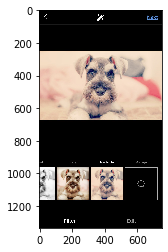

In [13]:
file = file_path + 'nashville_dog.jpg'
img_nashville = mpimg.imread(file)
plt.imshow(img_nashville)